sigma8 raw = 0.594
Scaling factor = 1.816
sigma8 normalized = 0.800


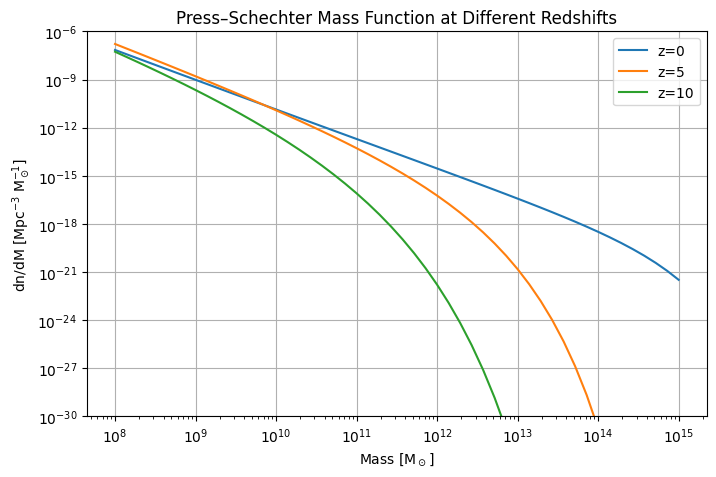

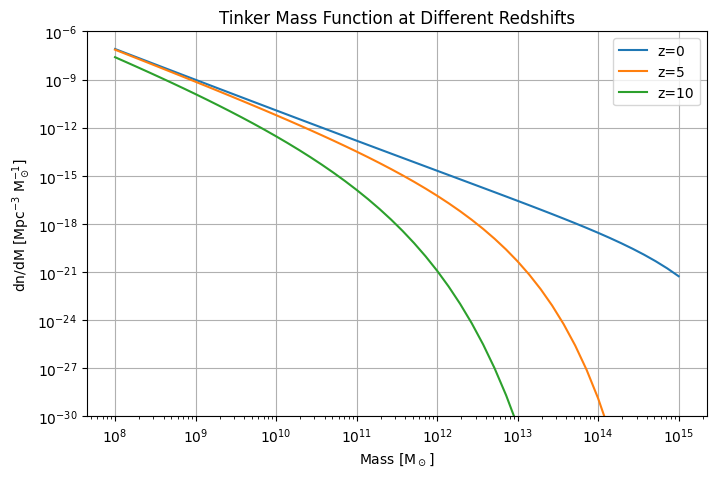

Press-Schechter mass function number densities:
z=0:
Bin 1e+07 to 1e+08: 5.145e+01
Bin 1e+08 to 1e+09: 6.981e+00
Bin 1e+09 to 1e+10: 9.712e-01
Bin 1e+10 to 1e+11: 1.386e-01
Bin 1e+11 to 1e+12: 2.010e-02
Bin 1e+12 to 1e+13: 2.852e-03
Bin 1e+13 to 1e+14: 3.427e-04
Bin 1e+14 to 1e+15: 2.047e-05
Total collapsed mass density at z=0: 3.548e+10 M_sun/Mpc^3
z=5:
Bin 1e+07 to 1e+08: 1.405e+02
Bin 1e+08 to 1e+09: 1.486e+01
Bin 1e+09 to 1e+10: 1.353e+00
Bin 1e+10 to 1e+11: 9.002e-02
Bin 1e+11 to 1e+12: 3.020e-03
Bin 1e+12 to 1e+13: 2.128e-05
Bin 1e+13 to 1e+14: 2.724e-09
Bin 1e+14 to 1e+15: 1.167e-18
Total collapsed mass density at z=5: 1.338e+10 M_sun/Mpc^3
z=10:
Bin 1e+07 to 1e+08: 6.713e+01
Bin 1e+08 to 1e+09: 3.916e+00
Bin 1e+09 to 1e+10: 1.328e-01
Bin 1e+10 to 1e+11: 1.589e-03
Bin 1e+11 to 1e+12: 2.240e-06
Bin 1e+12 to 1e+13: 2.368e-11
Bin 1e+13 to 1e+14: 5.706e-22
Bin 1e+14 to 1e+15: 0.000e+00
Total collapsed mass density at z=10: 2.757e+09 M_sun/Mpc^3


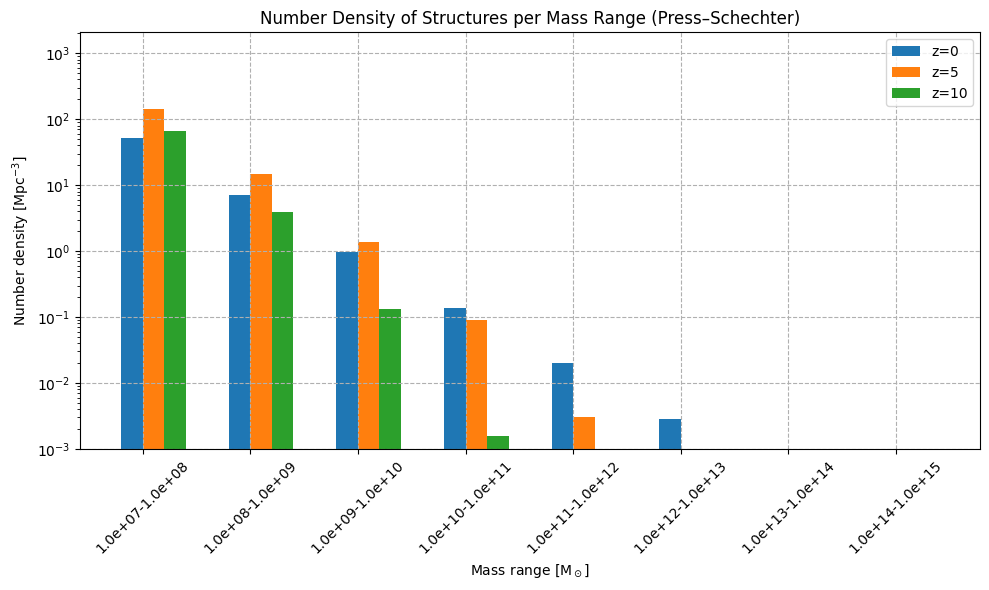

Tinker mass function number densities:
Tinker z=0:
Bin 1e+07 to 1e+08: 6.438e+01
Bin 1e+08 to 1e+09: 7.658e+00
Bin 1e+09 to 1e+10: 9.321e-01
Bin 1e+10 to 1e+11: 1.172e-01
Bin 1e+11 to 1e+12: 1.530e-02
Bin 1e+12 to 1e+13: 2.054e-03
Bin 1e+13 to 1e+14: 2.586e-04
Bin 1e+14 to 1e+15: 1.972e-05
Total collapsed mass density at z=0 (Tinker): 2.977e+10 M_sun/Mpc^3
Tinker z=5:
Bin 1e+07 to 1e+08: 6.201e+01
Bin 1e+08 to 1e+09: 6.594e+00
Bin 1e+09 to 1e+10: 6.289e-01
Bin 1e+10 to 1e+11: 4.706e-02
Bin 1e+11 to 1e+12: 2.022e-03
Bin 1e+12 to 1e+13: 2.364e-05
Bin 1e+13 to 1e+14: 9.616e-09
Bin 1e+14 to 1e+15: 1.019e-16
Total collapsed mass density at z=5 (Tinker): 6.393e+09 M_sun/Mpc^3
Tinker z=10:
Bin 1e+07 to 1e+08: 2.825e+01
Bin 1e+08 to 1e+09: 1.871e+00
Bin 1e+09 to 1e+10: 7.938e-02
Bin 1e+10 to 1e+11: 1.414e-03
Bin 1e+11 to 1e+12: 4.188e-06
Bin 1e+12 to 1e+13: 2.052e-10
Bin 1e+13 to 1e+14: 1.893e-19
Bin 1e+14 to 1e+15: 1.167e-43
Total collapsed mass density at z=10 (Tinker): 1.301e+09 M_sun/Mpc^3

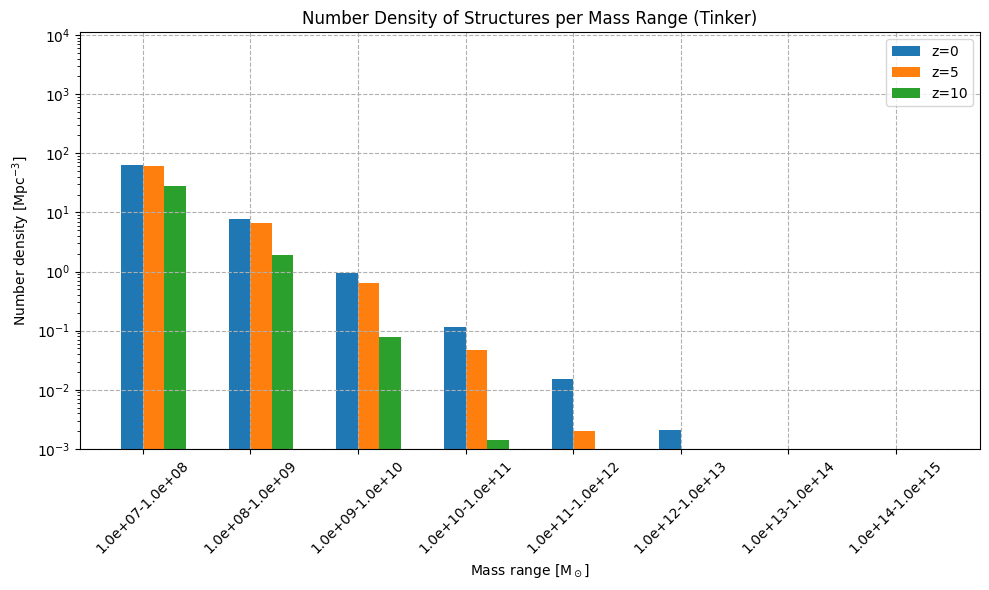

In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Cosmological parameters
Omega_m = 0.315  # unitless
Omega_lambda = 1 - Omega_m  # unitless
c = 299792.458  # km/s
h = 0.7  # unitless
H0 = 100 * h  # km/s/Mpc
rho_m = Omega_m * 2.775e11 * h**2  # Msun/Mpc^3
A_s = 2.1e-9  # unitless
n_s = 0.965  # unitless
k_pivot = 0.05  # 1/Mpc
epsabs = 1e-3
epsrel = 1e-4

def E(a):
    return np.sqrt(Omega_m / a**3 + Omega_lambda)

def D(a):
    integrand = lambda a_: (a_ * E(a_))**-3
    integral, _ = quad(integrand, 0, a, epsabs=1e-6)
    integral_norm, _ = quad(integrand, 0, 1, epsabs=1e-6)
    D_unnorm = (5 / 2) * Omega_m * E(a) * integral
    D_norm = (5 / 2) * Omega_m * E(1) * integral_norm
    return D_unnorm / D_norm

def T(k):
    q = k / (Omega_m * h**2)
    L0 = np.log(2 * np.e + 1.8 * q)
    C0 = 14.2 + 731.0 / (1 + 62.5 * q)
    return L0 / (L0 + C0 * q**2)

scaling_factor = 1.0

def P(k):
    P_zeta = A_s * (k / k_pivot)**(n_s - 1)
    T2 = T(k)**2
    factor = (c * k / H0)**2
    return 0.25 * scaling_factor * (2 * np.pi**2 / k**3) * P_zeta * T2 * factor**2

def sigma_R(R):
    integrand = lambda ln_k: np.exp(3 * ln_k) * P(np.exp(ln_k)) * (
        3 * (np.sin(np.exp(ln_k) * R) - (np.exp(ln_k) * R) * np.cos(np.exp(ln_k) * R)) / (np.exp(ln_k) * R)**3
    )**2
    result, _ = quad(integrand, np.log(1e-4), np.log(1e2), epsabs=epsabs, epsrel=epsrel)
    return np.sqrt(result / (2 * np.pi**2))

def sigma(M):
    R = (3 * M / (4 * np.pi * rho_m))**(1 / 3)
    return sigma_R(R)

R8 = 8.0 / h
sigma8_target = 0.8
sigma8_current = sigma_R(R8)
scaling_factor = (sigma8_target / sigma8_current)**2
sigma8_normalized = sigma_R(R8)

print(f"sigma8 raw = {sigma8_current:.3f}")
print(f"Scaling factor = {scaling_factor:.3f}")
print(f"sigma8 normalized = {sigma8_normalized:.3f}")

delta_sigma = 0.01

def sigma_with_growth(M, growth):
    return sigma(M) * growth

def sigma_and_dlnsigma(M, growth):
    sigma_M = sigma_with_growth(M, growth)
    sigma_plus = sigma_with_growth(M * (1 + delta_sigma), growth)
    sigma_minus = sigma_with_growth(M * (1 - delta_sigma), growth)
    dln_sigma_dlnM = (np.log(sigma_plus) - np.log(sigma_minus)) / (2 * delta_sigma)
    return sigma_M, dln_sigma_dlnM

def PS(M, z, growth=None):
    delta_c = 1.686
    if growth is None:
        growth = D(1 / (1 + z))
    sigma_M, dln_sigma_dlnM = sigma_and_dlnsigma(M, growth)
    factor = np.sqrt(2 / np.pi) * rho_m / M**2 * (delta_c / sigma_M) * np.abs(dln_sigma_dlnM)
    exponent = -delta_c**2 / (2 * sigma_M**2)
    if exponent < -50:
        return 0.0
    return factor * np.exp(exponent)

def tinker_parameters(z, delta=200):
    if delta != 200:
        raise ValueError("Only Delta=200 is implemented")
    A = 0.186 * (1 + z)**-0.14
    a = 1.47 * (1 + z)**-0.06
    alpha = 0.14
    b = 2.57 * (1 + z)**-alpha
    c = 1.19
    return A, a, b, c

def Tinker(M, z, delta=200, growth=None):
    if growth is None:
        growth = D(1 / (1 + z))
    sigma_M, dln_sigma_dlnM = sigma_and_dlnsigma(M, growth)
    A, a, b, c = tinker_parameters(z, delta)
    if sigma_M <= 0:
        return 0.0
    f_sigma = A * (((sigma_M / b)**-a) + 1.0) * np.exp(-c / sigma_M**2)
    return f_sigma * (rho_m / M**2) * np.abs(dln_sigma_dlnM)

mass_bins = np.logspace(7, 15, 9)
mass_midpoints = np.sqrt(mass_bins[:-1] * mass_bins[1:])
z_vals = [0, 5, 10]

M_vals = np.logspace(8, 15, 50)
growth_factors = {z: D(1 / (1 + z)) for z in z_vals}

ps_curves = {}
tinker_curves = {}
common_min = np.inf
common_max = 0.0

for z in z_vals:
    growth = growth_factors[z]
    ps_vals = np.array([PS(M, z, growth) for M in M_vals])
    tinker_vals = np.array([Tinker(M, z, growth=growth) for M in M_vals])
    ps_curves[z] = ps_vals
    tinker_curves[z] = tinker_vals

ymin = 1e-30
ymax = 1e-6

plt.figure(figsize=(8, 5))
for z in z_vals: plt.loglog(M_vals, ps_curves[z], label=f'z={z}')
plt.xlabel('Mass [M$_\\odot$]')
plt.ylabel('dn/dM [Mpc$^{-3}$ M$_\\odot^{-1}$]')
plt.legend()
plt.title('Press–Schechter Mass Function at Different Redshifts')
plt.grid(True)
plt.ylim(ymin, ymax)
plt.show()

plt.figure(figsize=(8, 5))
for z in z_vals: plt.loglog(M_vals, tinker_curves[z], label=f'z={z}')
plt.xlabel('Mass [M$_\\odot$]')
plt.ylabel('dn/dM [Mpc$^{-3}$ M$_\\odot^{-1}$]')
plt.legend()
plt.title('Tinker Mass Function at Different Redshifts')
plt.grid(True)
plt.ylim(ymin, ymax)
plt.show()

plt.figure(figsize=(10, 6))
width = 0.2
indices = np.arange(len(mass_bins) - 1)

print("Press-Schechter mass function number densities:")

for i, z in enumerate(z_vals):
    growth = growth_factors[z]
    number_density = []
    print(f"z={z}:")
    total_mass_density = 0.0
    for j in range(len(mass_bins) - 1):
        M1, M2 = mass_bins[j], mass_bins[j + 1]
        integrand = lambda M: PS(M, z, growth)
        integral, _ = quad(integrand, M1, M2, epsabs=epsabs, epsrel=epsrel)
        number_density.append(integral)
        print(f"Bin {M1:.0e} to {M2:.0e}: {integral:.3e}")
        mass_integrand = lambda M: M * PS(M, z, growth)
        mass_contrib, _ = quad(mass_integrand, M1, M2, epsabs=epsabs, epsrel=epsrel)
        total_mass_density += mass_contrib
    print(f"Total collapsed mass density at z={z}: {total_mass_density:.3e} M_sun/Mpc^3")
    plt.bar(indices + i * width, number_density, width, label=f'z={z}')

plt.xlabel('Mass range [M$_\\odot$]')
plt.ylabel('Number density [Mpc$^{-3}$]')
plt.title('Number Density of Structures per Mass Range (Press–Schechter)')
plt.xticks(indices + width / 2, [f'{mass_bins[i]:.1e}-{mass_bins[i + 1]:.1e}' for i in range(len(mass_bins) - 1)], rotation=45)
plt.yscale('log')
plt.ylim(bottom=1e-3)
plt.legend()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

print("Tinker mass function number densities:")

plt.figure(figsize=(10, 6))
for i, z in enumerate(z_vals):
    growth = growth_factors[z]
    number_density = []
    print(f"Tinker z={z}:")
    total_mass_density = 0.0
    for j in range(len(mass_bins) - 1):
        M1, M2 = mass_bins[j], mass_bins[j + 1]
        integrand = lambda M: Tinker(M, z, growth=growth)
        integral, _ = quad(integrand, M1, M2, epsabs=epsabs, epsrel=epsrel)
        number_density.append(integral)
        print(f"Bin {M1:.0e} to {M2:.0e}: {integral:.3e}")
        mass_integrand = lambda M: M * Tinker(M, z, growth=growth)
        mass_contrib, _ = quad(mass_integrand, M1, M2, epsabs=epsabs, epsrel=epsrel)
        total_mass_density += mass_contrib
    print(f"Total collapsed mass density at z={z} (Tinker): {total_mass_density:.3e} M_sun/Mpc^3")
    plt.bar(indices + i * width, number_density, width, label=f'z={z}')

plt.xlabel('Mass range [M$_\\odot$]')
plt.ylabel('Number density [Mpc$^{-3}$]')
plt.title('Number Density of Structures per Mass Range (Tinker)')
plt.xticks(indices + width / 2, [f'{mass_bins[i]:.1e}-{mass_bins[i + 1]:.1e}' for i in range(len(mass_bins) - 1)], rotation=45)
plt.yscale('log')
plt.ylim(bottom=1e-3)
plt.legend()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()
